In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'C:\Users\Emincan\Desktop\Playground\train.csv')
test = pd.read_csv(r'C:\Users\Emincan\Desktop\Playground\test.csv')
sub = pd.read_csv(r'C:\Users\Emincan\Desktop\Playground\sample_submission.csv')

test_ids = test['id']

train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
train.shape

(74051, 10)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [5]:
train.drop('id' , axis =1 , inplace = True)
test.drop('id' , axis =1 , inplace = True)

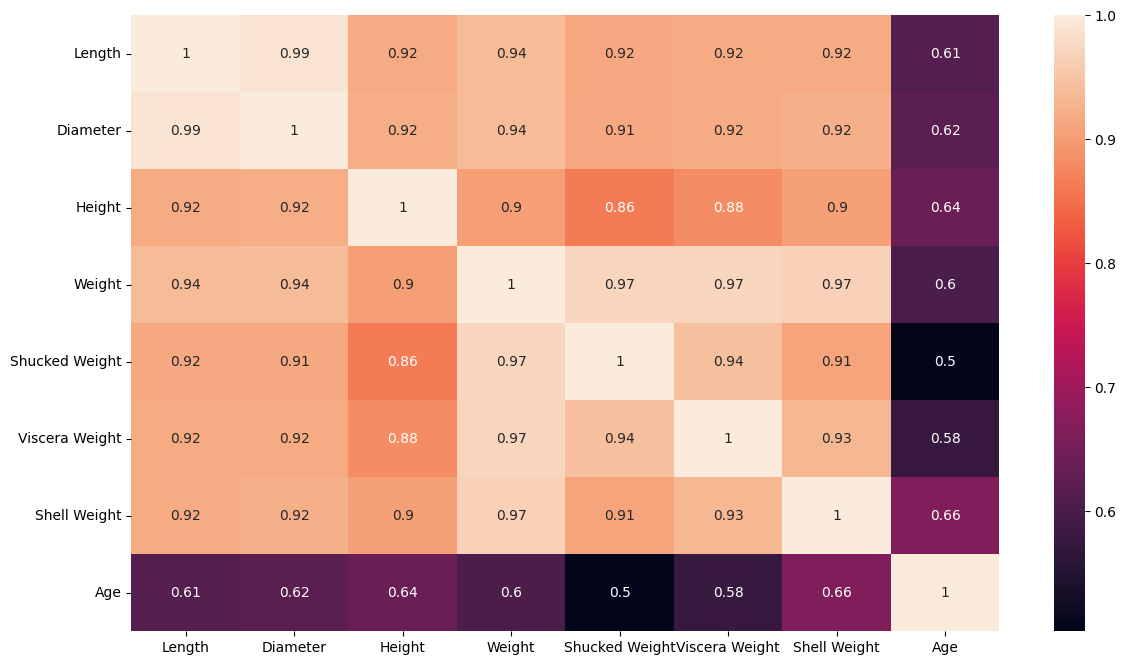

In [6]:
plt.figure(figsize=(14,8) ,dpi=100)

sns.heatmap(train.corr(numeric_only=True) , annot = True);

# Utils

In [7]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN



class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

    # Fonksiyonun özeti
    def summary(df):
        # Print the shape of the DataFrame
        print(f'data shape: {df.shape}')  
        # Create a summary DataFrame
        summ = pd.DataFrame(df.dtypes, columns=['data type'])
        # Calculate the number of missing values
        summ['#missing'] = df.isnull().sum().values 
        # Calculate the percentage of missing values
        summ['%missing'] = df.isnull().sum().values / len(df)* 100
        # Calculate the number of unique values
        summ['#unique'] = df.nunique().values
        # Create a descriptive DataFrame
        desc = pd.DataFrame(df.describe(include='all').transpose())
        # Add the minimum, maximum, and first three values to the summary DataFrame
        summ['min'] = desc['min'].values
        summ['max'] = desc['max'].values
        summ['first value'] = df.loc[0].values
        summ['second value'] = df.loc[1].values
        summ['third value'] = df.loc[2].values
        
        # Return the summary DataFrame
        return summ
    
    def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
        corr = df.corr(numeric_only = True)  
        fig, axes = plt.subplots(figsize=(14, 8))
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
        plt.title(title_name)
        plt.show()

    # # plot_correlation_heatmap(original, 'Original Dataset Correlation')
    # plot_correlation_heatmap(train, 'Train Dataset Correlation')

# Which Tactic ?

In [8]:
class CFG:
    """
    Class'ın amacı:
    - Feature engineering aşamasını aç-kapa formatına dönüştürerek bug azaltmak
    - Nihai çözümümde bazı featurelar olmasa dahi deneme yapılan feature kapsamını genişletmek/gösterebilmek.
    """
    
    target = 'Age'
    train_path = r'C:\Users\Emincan\Desktop\Playground\train.csv'
    submission_path = '/kaggle/input/gdz-elektrik-datathon-2023/sample_submission.csv'
    read_from_path = True
    
    #Hangi dataların kullanılacağına karar verme
    cat = True
    sexDummy = False
    weightAverage = False
    
    
    #Feature türlerine karar verme
    production_lag_features = True
    consumption_lag_features = False
    diff_pct_features = False
    weather_lag_features = True
    solar_lag_features = True
    rolling_features = False
    rolling_shift_features = False
    
    #Feature parametreleri
    nasa_feature_columns =  ['T2M','T2MDEW','T2MWET','QV2M','RH2M','PRECTOTCORR','PS','WS10M','WD10M','WS50M']
    meteostat_feature_columns = ['dwpt','rhum','prcp','wdir','wspd','pres','coco']
    production_base_columns = ['fueloil','gasOil','blackCoal','lignite','geothermal','naturalGas','river','dammedHydro','lng','biomass','importCoal','asphaltiteCoal','wind','sun','importExport','wasteheat','total']
    consumption_base_columns = ['consumption']
    weather_lag_range = np.arange(0,51,5)
    rolling_range = np.arange(0,48,6)[1:]
    roll_types = ['mean','std','min','max']

# Use Tactics

In [9]:
if CFG.sexDummy:
    train = pd.get_dummies(train, columns=['Sex'])
    test = pd.get_dummies(test, columns=['Sex'])

if CFG.weightAverage:
    pass

In [10]:
fonks.summary(train)

data shape: (74051, 9)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
Sex,object,0,0.0,3,NaN,NaN,I,I,M
Length,float64,0,0.0,144,0.1875,2.012815,1.525,1.1,1.3875
Diameter,float64,0,0.0,122,0.1375,1.6125,1.175,0.825,1.1125
Height,float64,0,0.0,65,0.0,2.825,0.375,0.275,0.375
Weight,float64,0,0.0,3096,0.056699,80.101512,28.973189,10.418441,24.777463
Shucked Weight,float64,0,0.0,1766,0.028349,42.184056,12.728926,4.521745,11.3398
Viscera Weight,float64,0,0.0,967,0.042524,21.54562,6.647958,2.324659,5.556502
Shell Weight,float64,0,0.0,1048,0.042524,28.491248,8.348928,3.40194,6.662133
Age,int64,0,0.0,28,1.0,29.0,9,8,9


# Distribution

In [11]:
# select numerical and categorical variables respectively.
num_cols = test.select_dtypes(include=['float64']).columns.tolist()
cat_cols = test.select_dtypes(include=['object' , 'bool']).columns.tolist()
all_features = num_cols + cat_cols

### Target Distribution

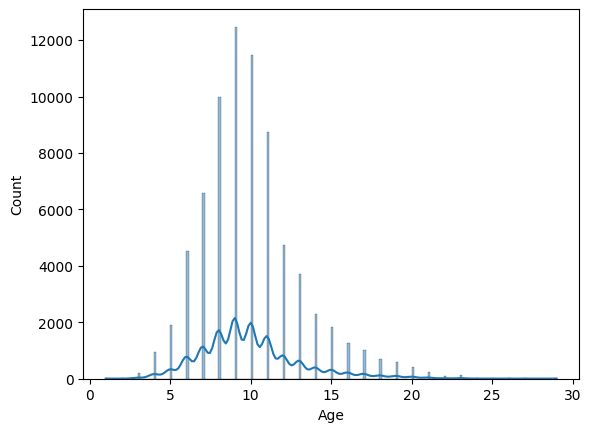

In [12]:
# let's check the distribution of target variable

sns.histplot(train, x="Age", kde=True)
plt.show()

# Numeric Distribution

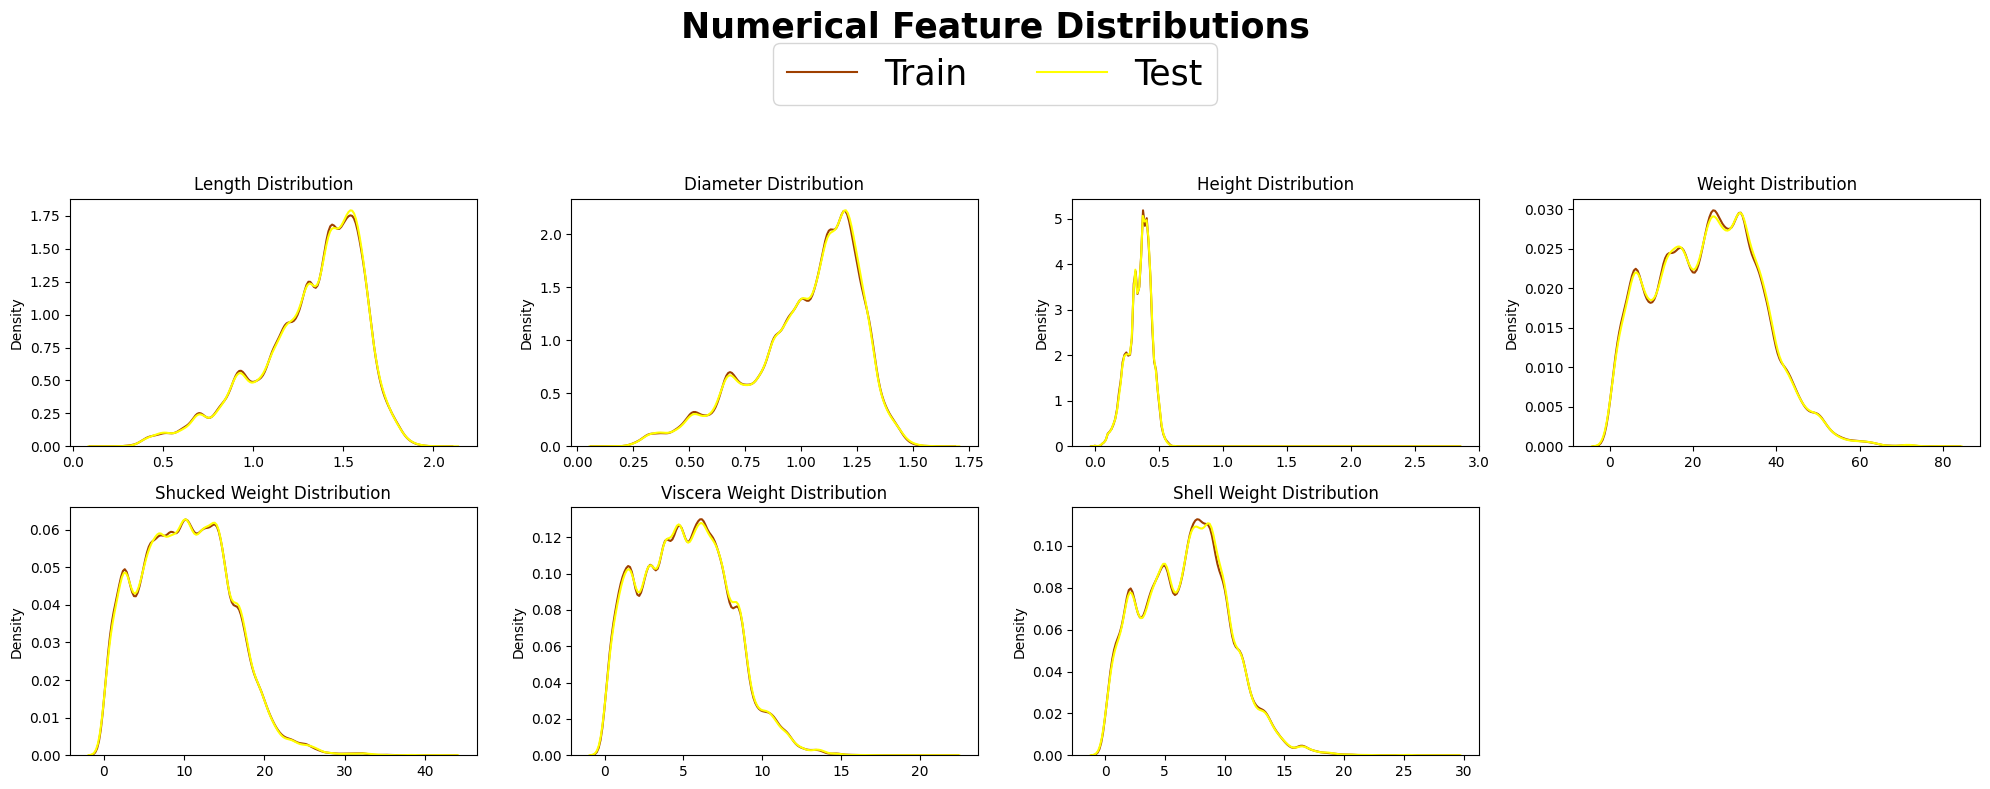

In [13]:
# check numerical variables' distribution
import math

features = num_cols
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        train[column], label='Train',
        ax=ax[i], color='#9E3F00'
    )
    
    sns.kdeplot(
        test[column], label='Test',
        ax=ax[i], color='yellow'
    )
    
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Numerical Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()

# kudos to @jcaliz /  
# refer to https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e7-2023-eda-and-submission

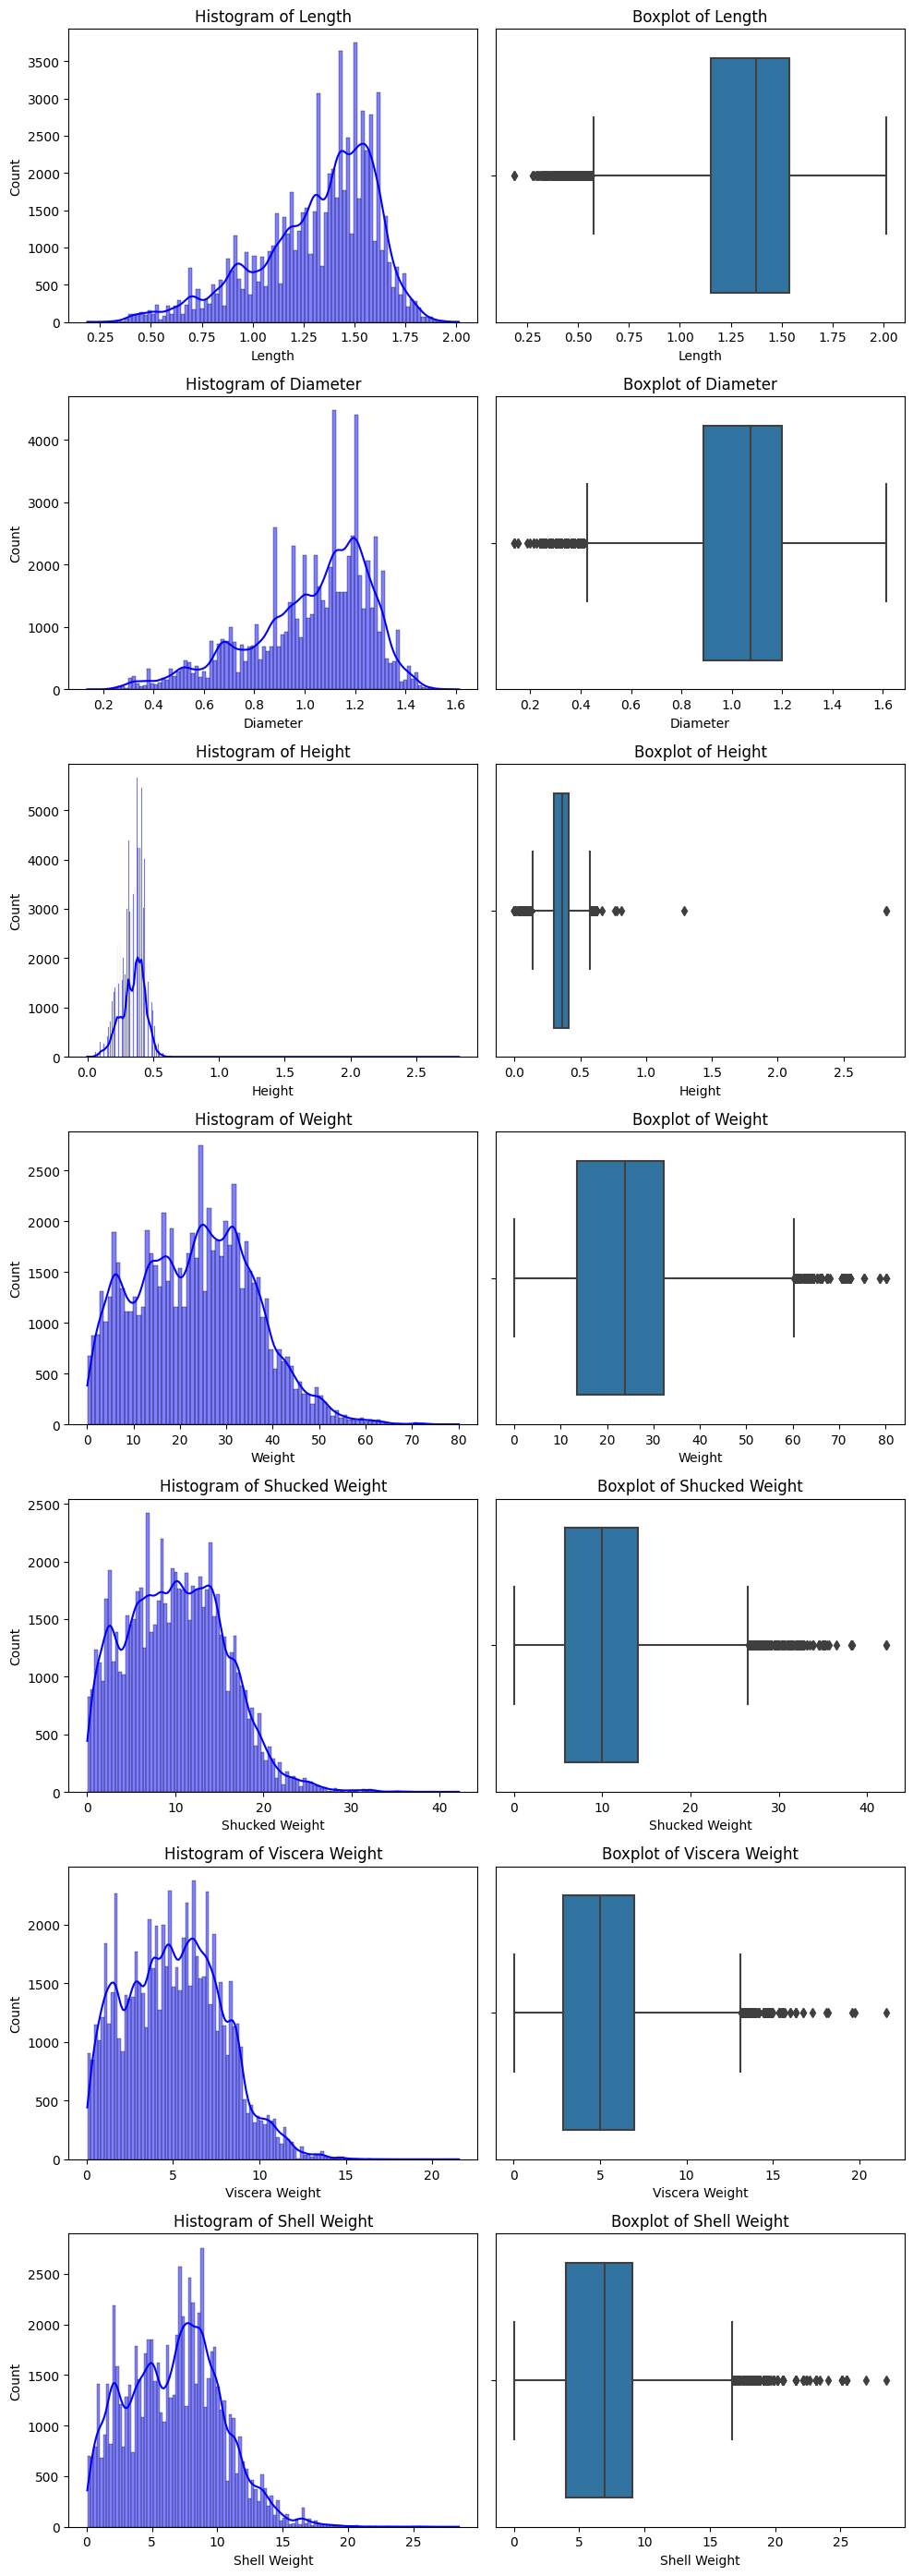

In [14]:
num_cols_count = len(num_cols)
n_rows = num_cols_count

fig, axs = plt.subplots(n_rows, 2, figsize=(10, n_rows*4))

for idx, col in enumerate(num_cols):

    # Plot histogram
    sns.histplot(data=train, x=col, kde=True, ax=axs[idx, 0], color='blue')
    axs[idx, 0].set_title(f'Histogram of {col}')

    # Plot boxplot
    sns.boxplot(data=train, x=col, ax=axs[idx, 1])
    axs[idx, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Categorical Distribution

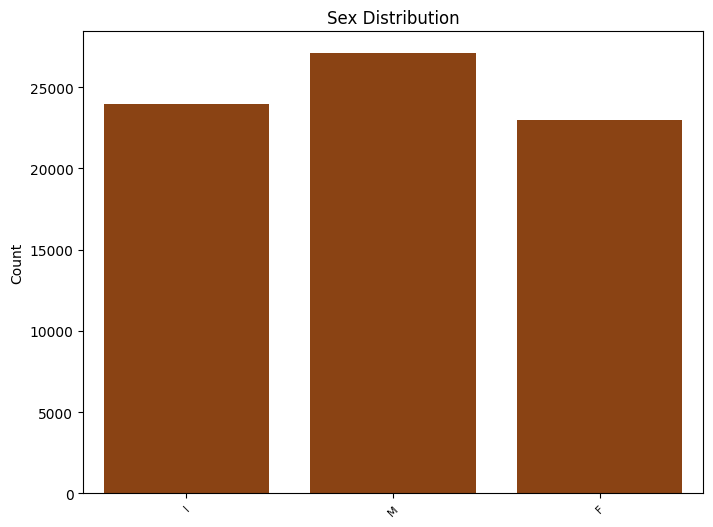

In [15]:
def plot_categorical_distribution(data, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, color='#9E3F00')
    plt.title(f'{column} Distribution')
    plt.xlabel(None)
    plt.ylabel('Count')
    plt.xticks(rotation=45, fontsize=8)
    plt.show()
# plot categorical variables

for col in cat_cols:
    plot_categorical_distribution(train, col)

# Correlations

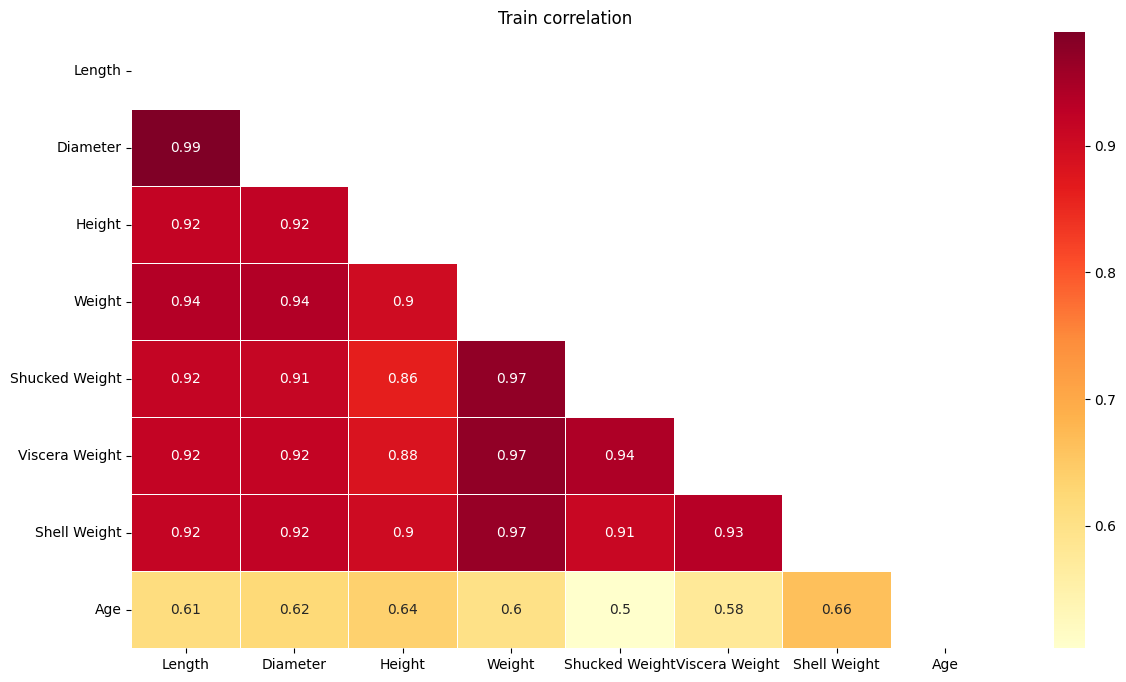

In [16]:
fonks.plot_correlation_heatmap(train)

# Preprocessing and Modelling

In [17]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

cv_scores = list()
importance_cb = list()
preds = list()

# Assuming 'train_df' is your DataFrame, and 'Age' is your target column
X = train.drop('Age', axis=1)
Y = train['Age']

if CFG.cat:
    # Preprocess categorical columns
    cat_cols = ['Sex']  # fill in the list of your categorical variables
    num_cols = []  # fill in the list of your numerical variables

    for c in cat_cols:
        X[c] = X[c].astype('category')
        X[c] = X[c].cat.codes
else:
    pass

params = {'learning_rate': 0.03,
          'objective':'MAE',
          'depth': 6,
          'early_stopping_rounds':1000,
          'iterations': 10000,
          'use_best_model': True,
          'eval_metric': "RMSE",
          'random_state': 986,
          'allow_writing_files': False,
          'thread_count':24
          }

## Running 3-fold CV
for i in range(3):
    print(f'\nFold {i+1} CV begins')
    skf = KFold(n_splits=3, random_state=np.random.randint(0, 999), shuffle=True)

    for train_ix, test_ix in skf.split(X, Y):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

        CB_md = CatBoostRegressor(**params,
                                  devices='0',
                                  cat_features=cat_cols).fit(X_train, Y_train)
        importance_cb.append(CB_md.feature_importances_)

        CB_pred_1 = np.round(CB_md.predict(X_test))
        mae = mean_absolute_error(Y_test, CB_pred_1)
        cv_scores.append(mae)
        print(f'Fold {i+1} CV done. MAE: \033[1;36m{mae:.5f}\033[0m')

scores = np.mean(cv_scores)
print(f'\nThe average MAE over 3-folds (run 3 times) is: \033[1;36m{scores:.5f}\033[0m')


Fold 1 CV begins
0:	learn: 2.3226713	total: 166ms	remaining: 5m 31s
1:	learn: 2.3133052	total: 187ms	remaining: 3m 6s
2:	learn: 2.3035649	total: 214ms	remaining: 2m 22s
3:	learn: 2.2941142	total: 226ms	remaining: 1m 52s
4:	learn: 2.2854293	total: 250ms	remaining: 1m 39s
5:	learn: 2.2762838	total: 278ms	remaining: 1m 32s
6:	learn: 2.2670831	total: 306ms	remaining: 1m 27s
7:	learn: 2.2575049	total: 329ms	remaining: 1m 21s
8:	learn: 2.2483973	total: 357ms	remaining: 1m 18s
9:	learn: 2.2388094	total: 387ms	remaining: 1m 16s
10:	learn: 2.2305059	total: 416ms	remaining: 1m 15s
11:	learn: 2.2211212	total: 444ms	remaining: 1m 13s
12:	learn: 2.2122502	total: 472ms	remaining: 1m 12s
13:	learn: 2.2034451	total: 502ms	remaining: 1m 11s
14:	learn: 2.1950039	total: 524ms	remaining: 1m 9s
15:	learn: 2.1862910	total: 546ms	remaining: 1m 7s
16:	learn: 2.1773967	total: 573ms	remaining: 1m 6s
17:	learn: 2.1693591	total: 601ms	remaining: 1m 6s
18:	learn: 2.1605617	total: 627ms	remaining: 1m 5s
19:	learn:

# Evaluation

C:\Users\Emincan\AppData\Local\Temp\ipykernel_26904\1485313532.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('YlOrRd')


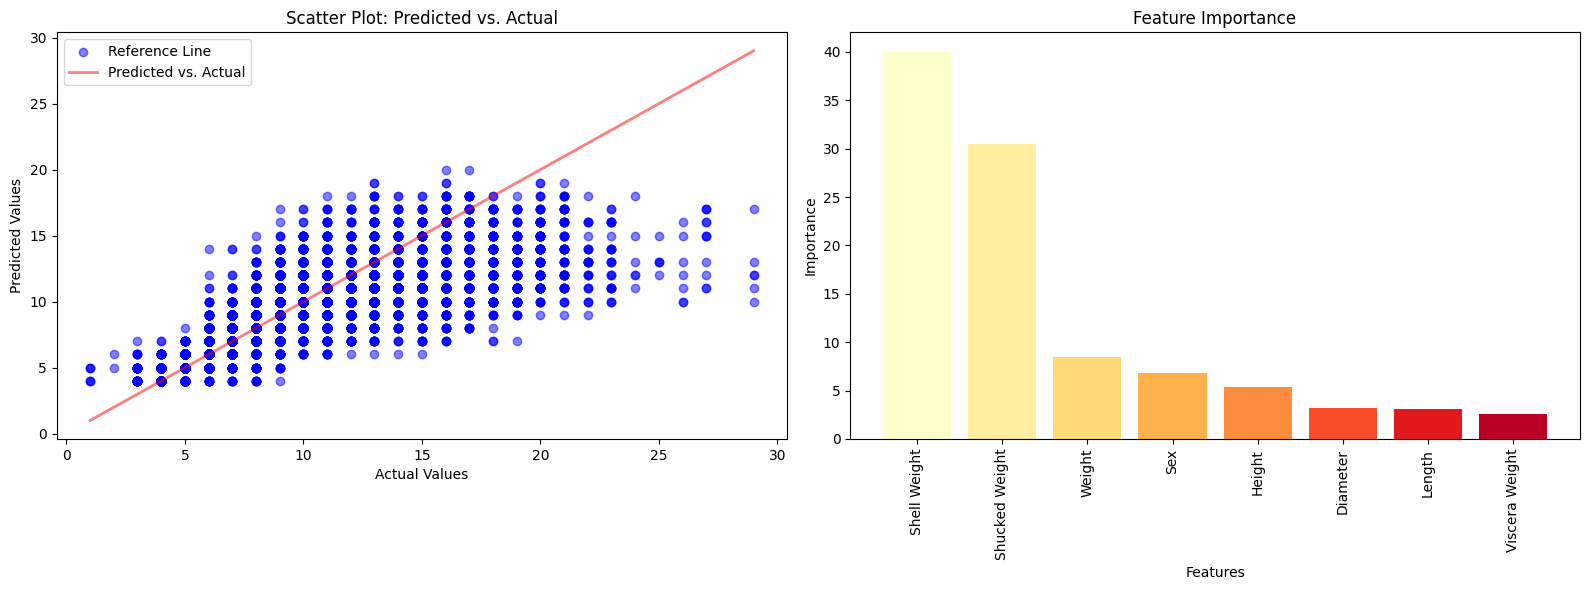

In [18]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming importance_xgb contains the feature importances from the XGB model
# Assuming preds contains the predictions from the XGB model

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of actual values vs predicted values
axes[0].scatter(Y_test, CB_pred_1, color='blue', label='Actual', alpha=0.5)
axes[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', alpha=0.5, linewidth=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Scatter Plot: Predicted vs. Actual')
axes[0].legend(['Reference Line', 'Predicted vs. Actual'])

# Feature Importance visualization
importance_xgb_avg = np.mean(importance_cb, axis=0)
sorted_feature_indices = np.argsort(importance_xgb_avg)[::-1]
sorted_feature_names = [X.columns[i] for i in sorted_feature_indices]
sorted_importance = importance_xgb_avg[sorted_feature_indices]

color_map = cm.get_cmap('YlOrRd')
colors = color_map(np.arange(len(sorted_feature_names)) / len(sorted_feature_names))

axes[1].bar(range(len(sorted_feature_names)), sorted_importance, color=colors)
axes[1].set_xticks(range(len(sorted_feature_names)))
axes[1].set_xticklabels(sorted_feature_names, rotation='vertical')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Importance')
axes[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

# Final Model

In [19]:
X_test

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
5,2,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860
6,2,1.5750,1.1375,0.3500,30.022120,11.935140,7.342521,8.646598
8,0,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810
...,...,...,...,...,...,...,...,...
74038,0,1.4250,1.1125,0.3750,22.537852,10.801160,4.890289,6.236890
74040,1,0.8750,0.6250,0.2000,4.805240,2.296310,0.963883,1.502523
74042,1,1.1375,0.8875,0.3125,15.039410,7.243297,3.727959,3.784658
74043,2,1.2500,1.0000,0.3000,17.463292,6.775531,3.898056,5.244657


In [20]:
test.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [21]:
cat_cols = ['Sex']  # fill in the list of your categorical variables
num_cols = []  # fill in the list of your numerical variables

for c in cat_cols:
    test[c] = test[c].astype('category')
    test[c] = test[c].cat.codes

In [22]:
test.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [23]:
cb_preds1 = np.round(CB_md.predict(test))

In [24]:
cb_preds1

array([ 7.,  8., 10., ..., 12.,  9., 12.])

In [25]:
sub['Age'] = cb_preds1

In [26]:
sub.to_csv('preds/cb_preds2.csv', index=False)

In [ ]:
# 